In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [5]:
# Display the first few rows
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [7]:
# Check for missing values (Iris doesn't have any, but let's simulate for practice)
data.iloc[0, 0] = np.nan  # Introduce a missing value for demonstration
data.fillna(data.mean(), inplace=True)  # Handle missing values by replacing with column mean

In [9]:
# Normalize features
scaler = StandardScaler()
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])

In [11]:
# Display preprocessed data
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0      -2.158257e-15          1.019004          -1.340227         -1.315444   
1      -1.152203e+00         -0.131979          -1.340227         -1.315444   
2      -1.395201e+00          0.328414          -1.397064         -1.315444   
3      -1.516700e+00          0.098217          -1.283389         -1.315444   
4      -1.030704e+00          1.249201          -1.340227         -1.315444   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Model: Model Selection, Training, and Evaluation

In [13]:
# Split data into features and labels
X = data[iris.feature_names]
y = data['target']

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Import the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



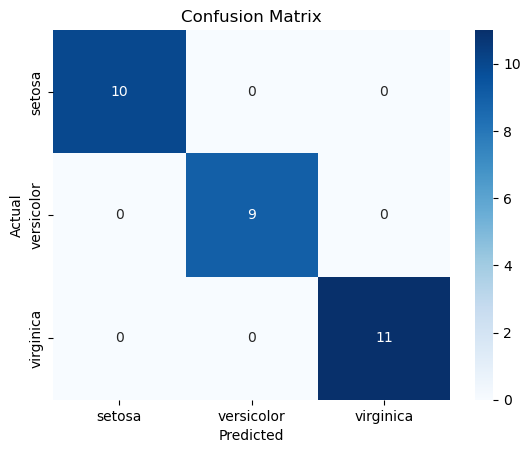

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Prediction

In [25]:
# Make predictions on new data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
new_data_scaled = scaler.transform(new_data)  # Scale the input
prediction = model.predict(new_data_scaled)
predicted_class = iris.target_names[prediction[0]]
print(f"Predicted Class: {predicted_class}")

Predicted Class: setosa


C:\Users\KRISHNA\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\KRISHNA\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Optional Features
### Feature Importance Visualization

In [27]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': iris.feature_names, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_19996\2429090181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


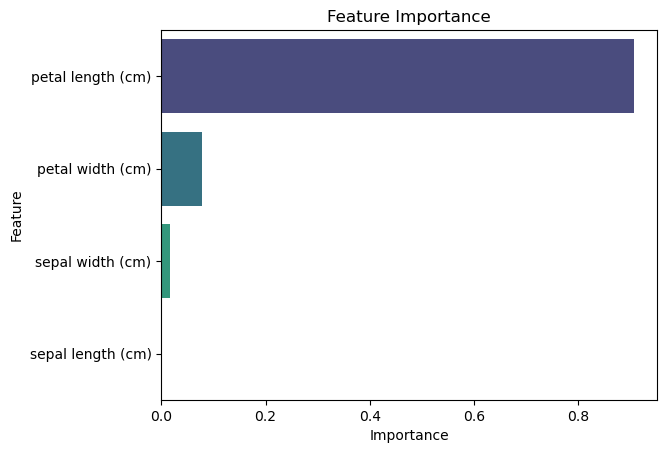

In [29]:
# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.show()